In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [15]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
#delete id
train.drop(columns=["Id"], inplace=True)

In [18]:
train.shape

(1460, 80)

Delete features that have more than 1000 null values (even though the null values mean something, these variables have the same value for almost all instances)

In [19]:
train.isna().sum()[lambda x: x > 1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [20]:
train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [21]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [22]:
numeric_features = train.select_dtypes(include=["int64", "float"])
numeric_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
# Check for categorical variables that may be represented with numbers:
number_distinct_values = [10, 20, 30]
possible_categorical = []


for col in numeric_features.columns:
    for n in number_distinct_values:
        distinct_values = train[col].nunique()
        if distinct_values < n:
            print(f"{col} has {distinct_values} distinct values. It's possible it is a categorical variable")
            possible_categorical.append(col)
            break


MSSubClass has 15 distinct values. It's possible it is a categorical variable
OverallQual has 10 distinct values. It's possible it is a categorical variable
OverallCond has 9 distinct values. It's possible it is a categorical variable
LowQualFinSF has 24 distinct values. It's possible it is a categorical variable
BsmtFullBath has 4 distinct values. It's possible it is a categorical variable
BsmtHalfBath has 3 distinct values. It's possible it is a categorical variable
FullBath has 4 distinct values. It's possible it is a categorical variable
HalfBath has 3 distinct values. It's possible it is a categorical variable
BedroomAbvGr has 8 distinct values. It's possible it is a categorical variable
KitchenAbvGr has 4 distinct values. It's possible it is a categorical variable
TotRmsAbvGrd has 12 distinct values. It's possible it is a categorical variable
Fireplaces has 4 distinct values. It's possible it is a categorical variable
GarageCars has 5 distinct values. It's possible it is a catego

In [24]:
possible_categorical

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

categoricals in possible_categoricals: 
MSSubClass
OverallQual
OverallCond
MoSold


In [25]:
categorical_features = train.select_dtypes(include=['object'])
cat_int = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']
for c in cat_int:
    numeric_features.drop(columns=[c], inplace=True)
    categorical_features[c] = train[c]
categorical_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,60,7,5,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,RFn,TA,TA,Y,WD,Normal,20,6,8,5
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,60,7,5,9
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,TA,TA,Y,WD,Abnorml,70,7,5,2
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,60,8,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,60,6,5,8
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Unf,TA,TA,Y,WD,Normal,20,6,6,2
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,RFn,TA,TA,Y,WD,Normal,70,7,9,5
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Unf,TA,TA,Y,WD,Normal,20,5,6,4


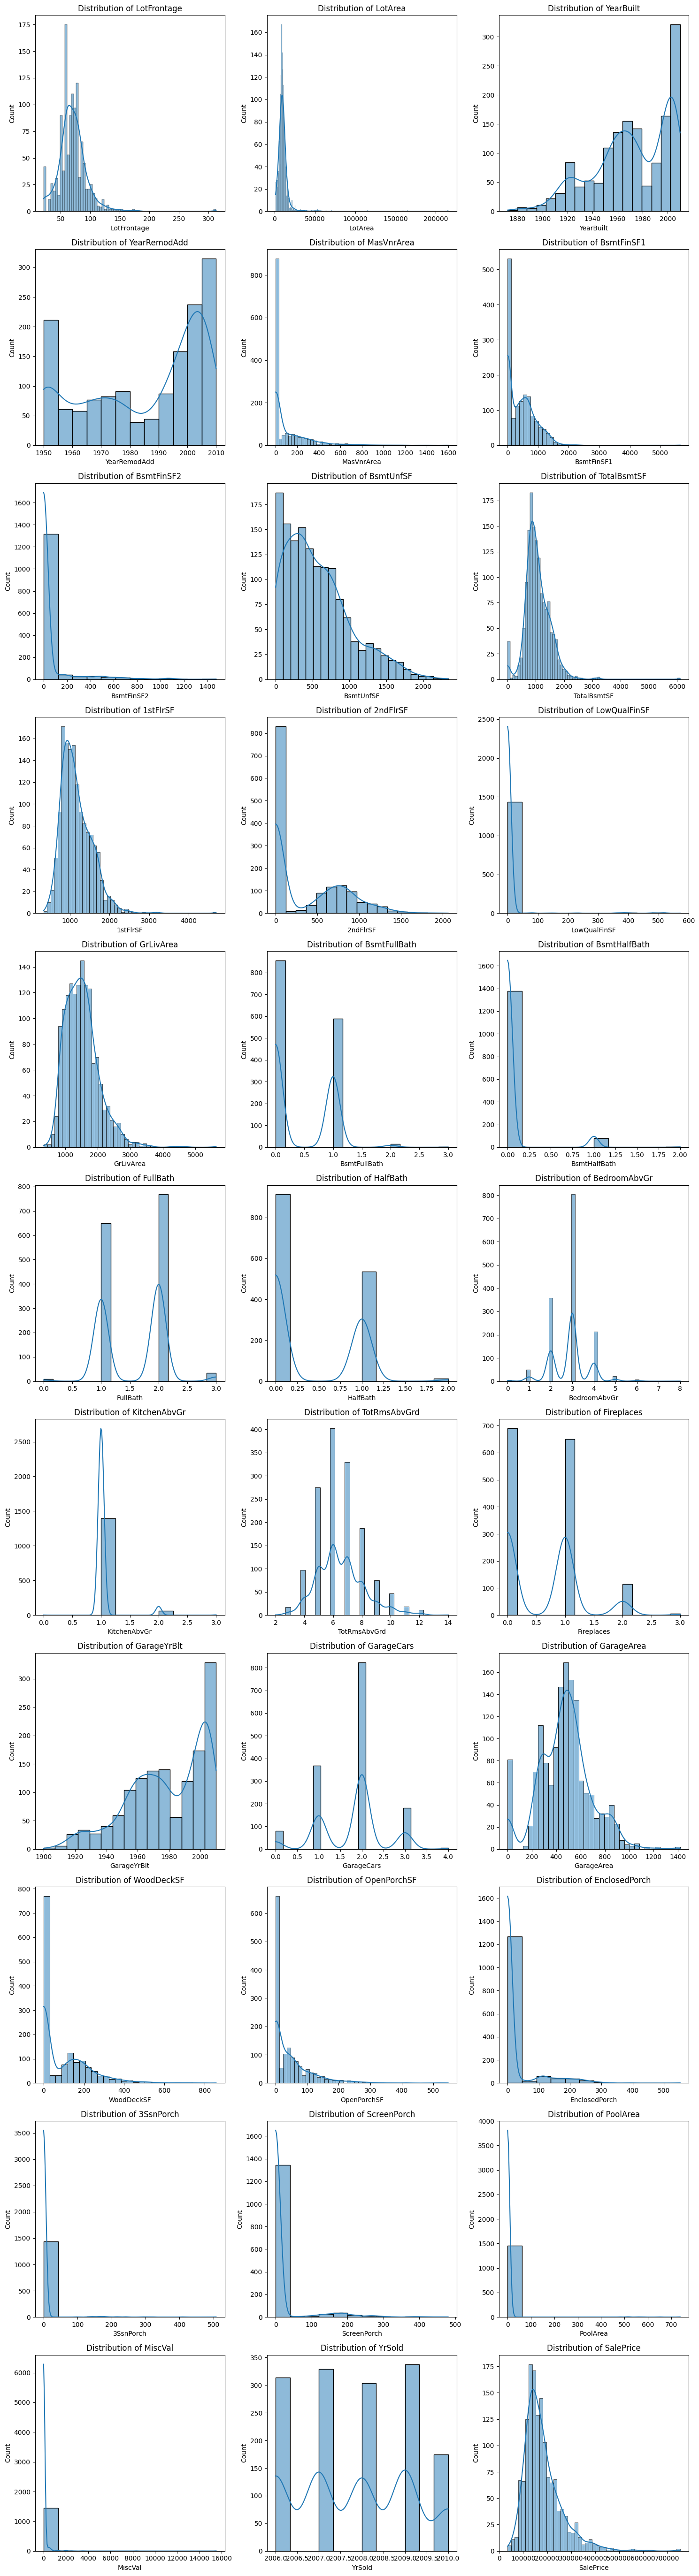

In [26]:
# Calculate grid dimensions
n_cols = len(numeric_features.columns)
n_rows = int(np.ceil(n_cols / 3))

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numeric_features.columns):
    sns.histplot(numeric_features[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

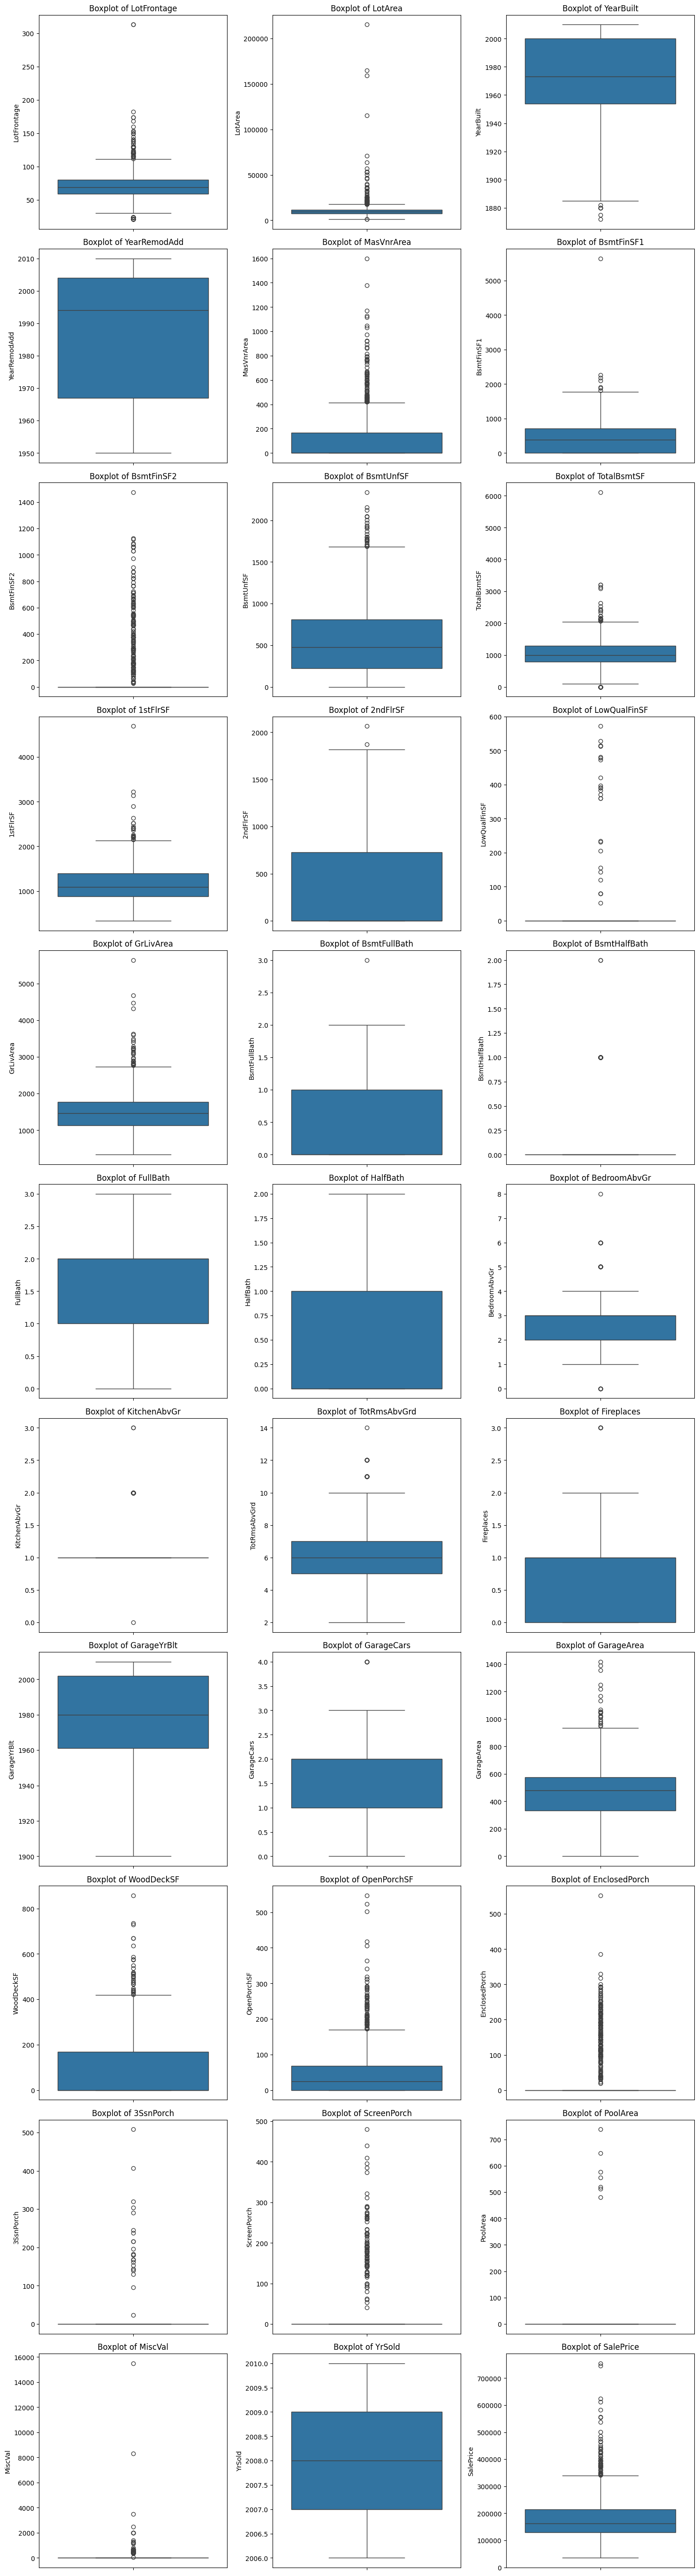

In [27]:
# Calculate grid dimensions
n_cols = len(numeric_features.columns)
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numeric_features.columns):
    sns.boxplot(y=numeric_features[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Remove highly skewed variables:\
MasVnrArea
BsmtFinSF2
LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal

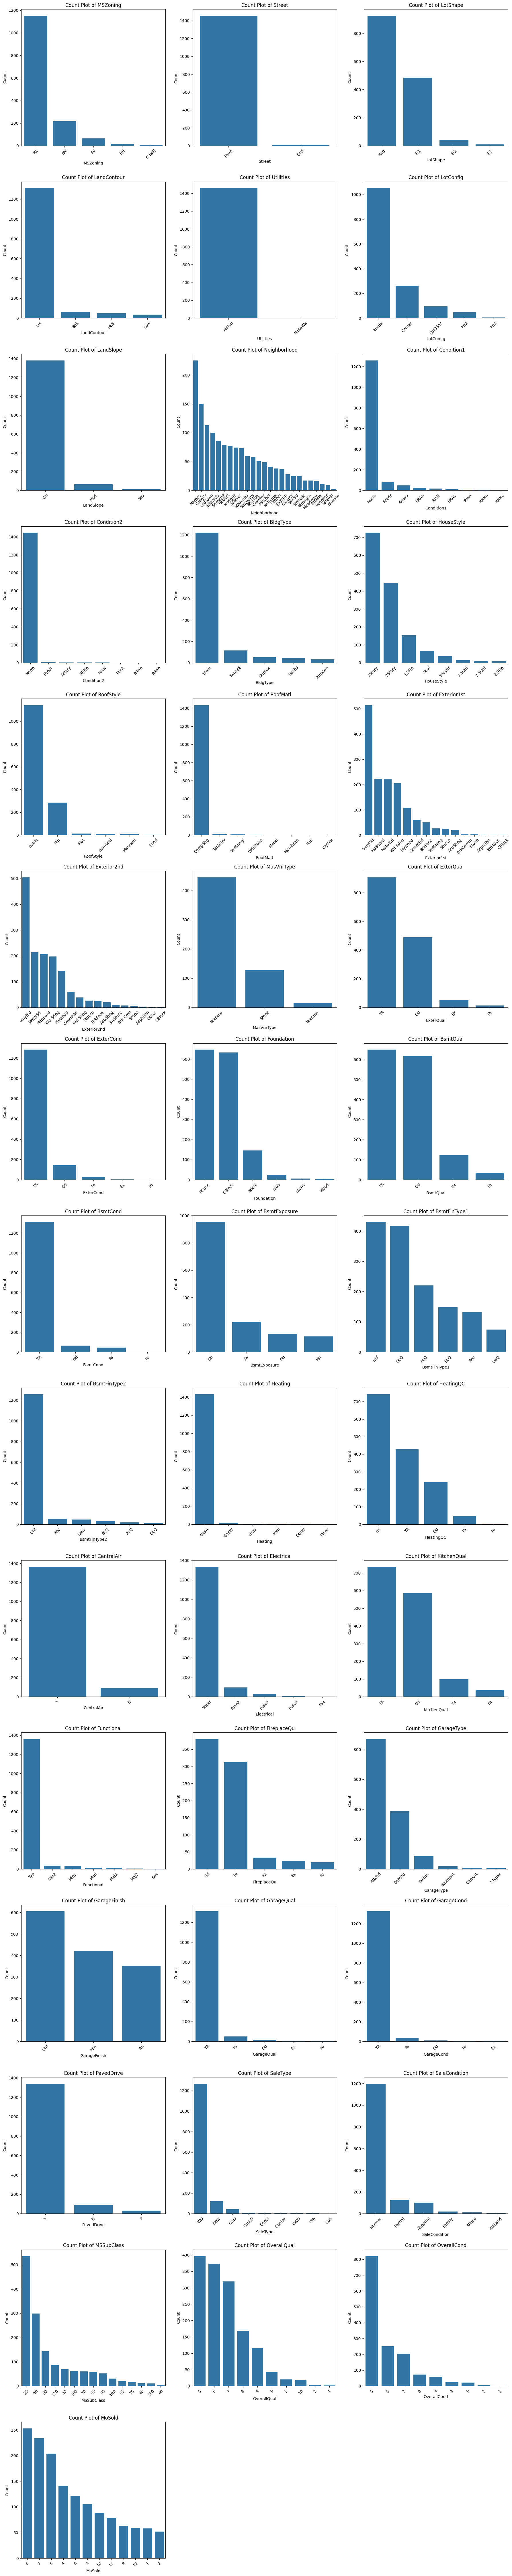

In [29]:
# Calculate grid dimensions
n_cols = len(categorical_features.columns)
n_rows = int(np.ceil(n_cols / 3))

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_features.columns):
    sns.countplot(data=categorical_features, x=column, ax=axes[i], order=categorical_features[column].value_counts().index)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()